[ 0.70710678  0.70710678 -0.70710678] 1.41421356237
[-0.70710678 -0.70710678  0.70710678] -1.41421356237


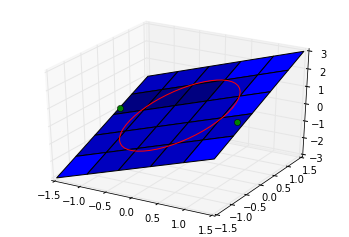

In [7]:
%matplotlib inline
import numpy as np
from scipy.optimize import fsolve
Lon

def func(X):
    x = X[0]
    y = X[1]
    L = X[2] # this is the multiplier. lambda is a reserved keyword in python
    return x + y + L * (x**2 + y**2 - 1)

def dfunc(X):
    dLambda = np.zeros(len(X))
    h = 1e-3 # this is the step size used in the finite difference.
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dLambda[i] = (func(X+dX)-func(X-dX))/(2*h);
    return dLambda

x = np.linspace(-1.5, 1.5)

[X, Y] = np.meshgrid(x, x)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, X + Y)

theta = np.linspace(0,2*np.pi);
R = 1.0
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)

ax.plot(x1, y1, x1 + y1, 'r-')

# this is the max
X1 = fsolve(dfunc, [1, 1, 0])
print X1, func(X1)

# this is the min
X2 = fsolve(dfunc, [-1, -1, 0])
print X2, func(X2)

ax.plot([X1[0], X2[0]], [X1[1], X2[1]], [X1[2], X2[2]], 'go')